<h1>Method</h1>

In this notebook will be moving on to a new topic known as Monte Carlo

---

<h3>Monte Carlo Method</h3>

Now, like the term dynamic programming, Monte Carlo is also not a technique that is specific to reinforcement learning

We may have seen dynamic programming in other contexts, so, too, with Monte Carlo

Monte Carlo is a general technique that can be used when we want to estimate some quantity with samples

---

<h3>Typical Monte Carlo Example: Estimate $\pi$</h3>

The typical example people use to introduce Monte Carlo goes something like this, although the instructor is not a huge fan of this example

Basically suppose we want to estimate $\pi$

Yes, we know that it's $3.14159...$, but let's pretend that we do not know this value

How can we estimate $\pi$?

The Monte Carlo approach is this

Suppose that we have a square and we're able to generate random samples of points uniformly inside this square 

For simplicity, let the side length of the square be 1

Now let's draw a circle inside this square such that the square fills the circle

Clearly the circle has diameter 1 or radius 1/2

<img src='extras/56.1.PNG' width='300'></img>

$\large \text{side length } = 1, \text{radius of circle } = \frac{1}{2}$

Now let's consider the areas of the square and the circle

$\large A_\text{square} = 1 \times 1 = 1$

$\large A_\text{circle} = \pi r^2 = \frac{\pi}{4}$

The key points are recognizes this

The ratio of the area between the circle and the square is $\frac{\pi}{4}$

This means that if we draw many samples uniformly inside the square, we will find that they fall inside the circle $\frac{\pi}{4}$

That is to say, $\frac{\pi}{4}$ tells us the proportion of uniformally sampled points that will fall inside the circle

Put another way, suppose we draw a very large number of points uniformly inside the square

We should find that the number of points $C$ that fall inside the circle divided by the total number of points $N$ is approximately equal to $\frac{\pi}{4}$

$\large \frac{\text{# points in circle}}{\text{# points in square}} = \frac{C}{N} = \frac{A_\text{circle}}{A_\text{square}} = \frac{\pi}{4}$

Therefore, our estimate of $\pi$, $\hat \pi$ will be 

$$\large \hat \pi = 4 \frac{C}{N}$$

OK, so this is the typical example people use to introduce Monte Carlo, which gives us the sense
that we can use sampling of random numbers to estimate some value

---

<h3>Real-World Use of Monte Carlo</h3>

So why does the isntructor not like this example?

Well, this example doesn't really tell us how Monte Varlo is used in the real world

In fact, the way Monte Carlo is used in the real world is much simpler, and it's actually a lot closer to how we will use it in these notebooks

And obviously, this is because reinforcement learning is a real world problem

So what is, in the instructor's opinion, a simpler introduction to Monte Carlo?

The main application of Monte Carlo is in estimating expected values

We may recall that we emphasised this in previous notebooks

It played a large role in the MDP notebook, it played a large role in the dynamic programming notebook, and it's going to, again, play a larger role now

So suppose we want the expected value of $X$ where $X$ is drawn from some distribution $p(X)$

Now, normally, if we knew $p(X)$, we could just use the usual formula to calculate $E(X)$

$$\large E(X) = \sum_x xp(x)$$

This is an integral if $X$ is continuous and a sum if $X$ is discrete

But suppose we do not know $p(X)$

Here's a simple example, suppose that we're in charge of city planning and we want to know the expected speed of vehicles driving down some road 

In order to compute this expected speed, we must know the distribution of speeds $p(X)$

Of course, there's no way for us to know this distribution

WE can't call every car owner and ask them to tell us their speed distribution and then try to combine them with some overall distribution of speeds

But what can we do instead?

Well, we can simply measure the speeds of actual cars driving down the road

If Iweadd them all together and divide by $N$, we will get the sample mean

As you recall, the sample mean is an estimate of the true mean, which is the $E(X)$

$$\large E(X) \approx \frac{1}{N} \sum^N_{i=1} x_i$$

Believe it or not, this simple process is Monte Carlo :)

---

<h3>Monte Carlo in Reinforcement Learning</h3>

So how does this apply and reinforcement learning?

Well, let's recall what we have done so far

We've essentially solved the reinforcement learning problem

Given some environment and state transition distribution, we know how to find the optimal policy for an agent acting in that environment

So what's the problem?

The problem is that our previous formulation had some pretty serious constraints

Specifically, we don't actually know the state transition distribution, $p(s^\prime \vert s,a)$ is typically unknown.

For example, imagine we're trying to build a computer program that drives an autonomous vehicle

There's absolutely no way we can practically enumerate all the possible states that a vehicle could be in and then come up with the next state probabilities

Furthermore, we'll recognize that our task in reinforcement learning is essentially to solve the Bellman equation to find the value function $V$ or $Q$, and according to the Bellman equation, this can be defined recursively in terms of an expectation

So let's summarize what we have

We have an expected value that we want to compute

$$\large V_\pi(s) = \sum_a \color{green}{\pi(a \vert s)} \sum_{s^\prime,r} \color{red}{p(s^\prime,r \vert s,a)}[r+\gamma V_\pi(s^\prime)]$$

recall : $\color{green}{Agent}, \color{red}{Enviroment}$

The problem is we can't compute this expected value because we don't know the distribution $p$ that the expected value was taken over

Now, technically, in this expected value, there are two distributions, there's $p$ which represents the environment dynamics and there's $\pi$, which represents the agent's policy

The policy is what we program in code, so this part we do know

However, not knowing one part is enough to prevent us from computing this expected value

And thus this is exactly the scenario we described previously for which Monte Carlo can be a possible solution

We want an expected value, but we don't know the distribution, we only have samples

Therefore, our solution will be to estimate this expected value with the sample mean

---

<h3>Notebook Outline</h3>

So the outline for this section will be as follows

As we'll see, it's pretty simple and it mirrors
what we did for dynamic programming

Again, we'll start with the prediction task, that is finding the $V(s)$ given a policy

This will allow us to establish the basics of the Monte Carlo method

The second step will be to solve the control task

As we'll see, using $V(s)$ is no longer a viable solution, so we'll need to involve the action value $Q$ 

We'll study two approaches for the control task, one that builds up from the basics but isn't that practical and one that is more practical

This will involve applying what we learned in the bandit notebook specifically that explore exploit dilema

---

<h3>Important Fact to Notice</h3>

One clear distinction between this notebook and the previous notebooks is this 

Reinforcement learning is all about trying to learn from experience, this is even encoded in its name

Reinforcement refers to the fact that we can provide the agent with rewards and the agent uses these rewards to modify and adapt its behavior

Greater reward acts as positive reinforcement, encouraging similar behavior in the future

Lesser rewards act as negative reinforcement, discouraging similar behavior in the future

The curious thing about the dynamic programming section was that it did not involve gaining any experience

We were able to solve the problem using only mathematics

Of course, this relied on an unrealistic assumption that we knew the environment dynamics.

Now, by building the environment ourselves, we can ensure that this was the case 

And noticed that this is actually a great benefit to us in this notebook

Because we built the environment ourselves, we're able to use the same environment for every notebook that uses Gridworld

By doing so, it allows us to compare each of the techniques we learn about in a very fair and consistent manner 

If we kept using different environments in each notebook, it wouldn't give us an intuitive sense for how these techniques compare to one another

So using the same environment each time is an advantage in that sense

Monte Carlo is the first notebook that will show us how to solve an MDP using experience only without needing to rely on the environment dynamics

So as you go through this notebook, compare and contrast these methods with what we learned previously in terms of performance, effectiveness, implementation and assumptions

<h1>Math</h1>

In this section, we'll be discussing how we can use Monte Carlo for evaluating a policy 

That is given a policy $\pi$, how do we find $V_\pi$ or $Q_\pi$ without making use of the environment dynamics 

---

<h3>Monte Carlo Prediction</h3>

To understand how to do this, let's start with the definition of the state value function $V_\pi(s)$

Note that we do not need to use the Bellman equation ( since again it depends on the envoroment dynamics which is now unavailable )

In this case, it's more convenient to express $V_\pi$ in terms of $G$

$$\large V_\pi(s) = E[G_t \vert S_t = s] \approx \frac{1}{N} \sum^N_{i=1} G_{i,s} $$

note : overloaded symbol $G_{i,s}$ represents the $i$'th sample return from the state $s$

So what does this definition tell us?

It tells us that if we want to find the value function, we can do so by taking the average of many returns sampled from the environment

Note that because the expected value is conditioned on the state $s$, we will have a different estimate for each state

Basically, all we need to do is play a bunch of episodes using our given policy and collect all the $G$s from those episodes

When we're done, we averaged the $G$s so that we can estimate the expected value

OK, so hopefully that's pretty simple

---

<h3>Monte Carlo Prediction: Complication #1 </h3>

Now, there are several complications to consider

What if we want to know the value of a state not visited by our policy 

In this case, we would have no samples and hence no estimate

One solution to this is to simply not compute any value for those states

Since those states are never visited, their values are irrelevant

Another solution to this is to manually put the agents into different starting states

For example, in Gridworld, this would mean not starting in the same position on every episode

Instead, we could choose starting positions at random to ensure that every state will have corresponding sample returns

<img src='extras/56.2.PNG' width='300'></img>

Note that this doesn't violate our policy because the return $G$ is calculated from future rewards, which are all received based on following the policy

Another thing to consider is that if our policy is probabilistic with a non-zero probability of performing every action from every state, then this wouldn't be a problem

Given enough time, we would collect a sufficient number of samples for each state

---

<h3>Monte Carlo Prediction: Complication #2 </h3>

The second complication to consider is this 

What if our policy is such that we encounter the same state more than once 

In this case, what is the return for the state?

<img src='extras/56.3.PNG' width='250'></img>

There are actually two solutions to this problem

Solution number one is to consider the return only for the first time the state was visited

This is called first visit Monte Carlo

Solution number two is to consider the return for every time the state was visited

This is called Every Visit Monte Carlo

It turns out that we can prove theoretically that these will both converge to the true answer

They have different convergence properties, but we would consider these details to be outside the scope of this notebook as they are not helpful for where we are going

---

<h3>Monte Carlo Prediction: Complication #3 </h3>

Yet another complication to consider is this 

This is somewhat related to the previous issue, which is that we may encounter the same state more than once

So now let's consider the problem where our policy leads to an infinite cycle

For example, suppose in one state the policy is to go left, but then in the state to the left, the policy is to go right

Clearly, this will just lead to going left and right forever

<img src='extras/56.4.PNG' width='250'></img>

The greater issue here is that what if we have an episode that never ends 

In this case, Monte Carlo methods do not apply because by definition of the Monte Carlo method, we can only compute the value once we know the return, but we only know the return after the episode is terminated

If the episode does not terminate, then the return cannot be computed and Monte Carlo methods cannot be employed

Practically speaking, when it comes to our environment, we will declare our episode complete when it reaches a certain number of steps

For example, we consider a $20$ steps or $100$ steps to be the end of an episode if we haven't yet reached the terminal state

So even if there is an infinite cycle, the episode will still terminate

Note that while this might seem like a hack, this is not really the case

For example, in other environments like Cartpole and Mountain Car, which are part of OpenAI Gym,
the episodes end after we reach 200 steps

So this is a completely normal thing to do

---

<h3>Pseudocode: Monte Carlo Prediciton</h3>

OK, so now that you understand some of the hidden details of the Monte Carlo method, let's consider
how this will look like in pseudocode 

```
Given: π
Initialise: V(s) = 0, returns(s) = [] for all s in state space

Loop until convergance:
    Play epsiode following π, obtain s(0),r(1),s(1),a(1),...,r(T),s(T)
    G = 0
    for t in {T-1,T-2,...,0}:
        G = r(t+1) + γG
        if s(t) not in {s(1),...,s(t-1)}:
            returns(s).append(G)
            V(s) = mean(returns(s))
```

To start will be given a policy $\pi$ that we wish to evaluate

To initialize our algorithm,wWe'll start by initializing our value function to zeros and we'll create a dictionary to store all of the returns we've collected for each state

The key for this dictionary will be the state and the value will be a list of returns that we've collected for that state

Next we'll enter a loop that will continue for as many iterations we think we need to obtain an accurate estimate

Of course, this will depend on how many samples we wish to collect

We might consider evaluating the accuracy using confidence intervals 

Inside the loop, we start by playing an episode using the given policy

This will generate a sequence of states and rewards

Next, we initialize a variable $G=0$

This will hold the return for each step of the following loop

Note that because the return is always based on the sum of future rewards, it's more practical to loop through our episode backwards and compute the return recursively

The return $G$ starts out at zero since the return for the terminal state is zero

Next, we loop through each timestep of the episode, starting at $T-1$ 

note that we do not start at the final timestep $T$ because we know that the value for that state will always be zero

So inside this loop, we begin by updating the return $G$ using the recursive formula we derived in an earlier notebook

Next, we check whether or not the state at time $t$ occurred earlier in the episode

This is when we want to do first visit Monte Carlo

If we want to do every visit Monte Carlo, then this check is not necessary

So only if this state does not appear earlier in the episode do we proceed 

Next, we simply append $G$ to our list of sample returns for the state $s(t)$

And finally, we update $V(s(t))$ by taking the average of the returns we've collected so far

---

---

<h3>One Tricky Implementation Detail</h3>

OK, so before we end this section, we want to make a small note about one tricky implementation detail

According to the instructor, we should attempt coding first then we can return here (we foud no problem finishing the excercise)

---

Basically, the key difficulty in implementing Monte Carlo is keeping track of the time indices

```python
grid.set_state(randomly_chosen_state)
s = grid.current_state()

states = [s]
rewards = []

while not grid.game_over():
    a = policy[s]
    r = r.grid.move(a)
    rewards.append(r)
    s = grid.current_state()
    states.append(s)
```

Let's begin with a naive implementation of Monte Carlo, where we keep track of every state and reward that we encounter

We start by randomly choosing a state to begin our episode 

Next week, grab the current state and store it in our list of states

We also initialize a list to store our rewards, 

Since we haven't received any rewards yet, it's just an empty list

Next, we do a loop that exits when the game is over

Note that we're ignoring the maximum time steps for simplicity, although in the code you will want to implement that as well

Inside the loop we grab the action according to our policy and perform that move in the environment

We then receive a reward which we append to uor lists of rewards

At this point, we can call the current state function again to get the new state and append this to our list of states

So what's the problem with this?

Firstly, notice how the list of states and rewards do not have the same length

When we start the episode, we have an initial state, but there's no such thing as an initial reward

The bigger problem is this

When we index the states list and the rewards list, the index will not refer to the same time step in both lists

This will lead to lots of confusion unless we track things very carefully

For example, if you want to have some time index $t$ the state list indexed by $t$ does not refer to the same timestep as the rewards list index by $t$

Therefore, using $t$ would be very misleading because it doesn't refer to the same timestep in both cases

---

Here's another way to do this that will make things a bit simpler to think about

It's basically a one character change where we add a zero to the initial rewards list

```python
grid.set_state(randomly_chosen_state)
s = grid.current_state()

states = [s]
rewards = [0]

while not grid.game_over():
    a = policy[s]
    r = r.grid.move(a)
    rewards.append(r)
    s = grid.current_state()
    states.append(s)
```

It's equivalent to saying we get a reward of zero at time zero when  we start the episode, which has no effect except to make the code easier to reason about

Notice that now when we index the states list and the rewards list, the index will correspond to the same time step for both lists

We'll see that in the code this value is never actually used

In fact, if we want to go back to the pseudocode we saw previously, we can confirm that this is
true even without looking at any code

Furthermore, note that the state at the final timestep as of $s(T)$ is also never used

So one kind of dangerous thing in terms of bugs is if we ignored the first reward and ignored the final state

In that case, both the states list and the rewards list would have the same length, but they would also be off by one in terms of which index corresponds to which timestep

So in the instructor's opinion, it's best to add these dummy values that will never be used, but make the time steps line up correctly

<h1>Code</h1>

In [1]:
# lets try implementing policy evaluation using Monte Carlo
import numpy as np

In [2]:
# first lets implement our Gridworld enviroment
# we will be using the same interface as described above

class GridWorld:
    def __init__(self,rows,cols,start_pos):
        self.rows = rows
        self.cols = cols
        self.pos = start_pos
    
    def current_state(self):
        return self.pos
    
    def set_state(self,state):
        self.pos = state
        
    def set_actions_rewards(self,actions,rewards):
        self.actions = actions
        self.rewards = rewards
        
    def all_states(self,):
        return [(i,j) for i in range(self.rows) for j in range(self.cols)]
    
    def is_terminal(self,state):
        # we cant perform an action in a terminal state
        # so we expect not to find it in the keys
        return state not in self.actions.keys()
    
    def game_over(self):
        return self.is_terminal(self.pos)
    
    def next_state(self,s,a):
        # return next state should we take action a
        # but do not take that action
        i,j = s
        # if we are allowed to do this action in our current position
        if a in self.actions.get(s,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        return (i,j)
    
    def move(self,a):
        # return next state should we take action a
        # this time we actually make the move
        # and thus return reward
        i,j = self.pos
        # if we are allowed to do this action in our current position
        if a in self.actions.get(self.pos,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        self.pos = (i,j)
        # if no reward return 0
        return self.rewards.get(self.pos,0)
    
    # lets add methods to print values and actions
    def print_values(self,V):
        for i in range(self.rows):
            print('-'*9*self.rows)
            for j in range(self.cols):
                v = V[i,j]
                if v >= 0:
                    # if 0 or +ve, add space so it aligns well when we have -
                    print(" %.2f|" %v,end="")
                else:
                    print("%.2f|" %v,end="")
            print("")
    
    def print_policy(self,P):
        for i in range(self.rows):
            print('-'*6*self.rows)
            for j in range(self.cols):
                print(" %s |" %P.get((i,j),' '),end="")
            print("")
                
    def state_to_loc(self,state): # convert state tupe (0,1) to location 1
        return state[0]*self.rows + state[1]

In [3]:
def standrad_grid():
    g = GridWorld(3,4,(2,0))
    rewards = {(0,3):1,(1,3):-1}
    actions = {
        (0,0): ('D','R'),
        (0,1): ('L','R'),
        (0,2): ('L','D','R'),
        (1,0): ('U','D'),
        (1,2): ('U','D','R'),
        (2,0): ('U','R'),
        (2,1): ('L','R'),
        (2,2): ('L','R','U'),
        (2,3): ('L','U')
    }
    g.set_actions_rewards(actions,rewards)
    return g

In [4]:
g = standrad_grid()

In [5]:
# fixed policy (deterministic)
policy = {
    (2,0) : 'U',
    (1,0) : 'U',
    (0,0) : 'R',
    (0,1) : 'R',
    (0,2) : 'R',
    (1,2) : 'R',
    (2,1) : 'R',
    (2,2) : 'R',
    (2,3) : 'U'    
}

In [6]:
g.print_policy(policy)

------------------
 R | R | R |   |
------------------
 U |   | R |   |
------------------
 U | R | R | U |


In [11]:
def monte_carlo_policy_eval():
    all_states = g.all_states()
    state_space = len(all_states)
    non_terminal_states = list(g.actions.keys())
    
    V = np.zeros(state_space).reshape((g.rows,g.cols))
    returns = {s:[] for s in all_states if not g.is_terminal(s)}
    gamma = 0.9
    for episode in range(100): # play 100 episodes
        # start in random state
        start_idx = np.random.choice(len(non_terminal_states))
        g.set_state(non_terminal_states[start_idx])
        states_rewards = []
        
        for t in range(20) : # max 20 time steps for each episode
            s = g.current_state()
            a = policy[s]
            r = g.move(a)
            s_prime = g.current_state()
            states_rewards.append((s,r))

            
            if g.is_terminal(s_prime):
                break
            
        G = 0
        # store seen (s,r) pairs
        seen = set()
        for s,r in reversed(states_rewards):
            G = r + gamma*G
            # first visit monte carlo
            if s not in seen: # remove this for mulitstep monte carlo
                seen.add((s,r))
                returns[s].append(G)
                V[s] = np.mean(returns[s])
    return V
            

In [12]:
V = monte_carlo_policy_eval()

In [13]:
g.print_values(V)

---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00|-1.00| 0.00|
---------------------------
 0.66|-0.81|-0.90|-1.00|


<h1>Math</h1>

OK, so we just learn how to solve the predicition problem using Monte Carlo 

That is given a policy $\pi$, we learned how to find $V_\pi(s)$

---

<h3>Monte Carlo for Control</h3>

As we know, the next question to consider is, how do we solve the control problem?

That is, how do we find the best policy $\pi^*$?

---

<h3>We already know how to solve this</h3>

Let's take a moment to consider that we actually already have all the tools we need to do this

In the previous notebook we learned about the concept of policy iteration

This is the idea that if we want to find the best policy, all we need to do is start from a random
policy

Then we find that policy's value function

After doing so, we can apply the policy improvement theorem, which allows us to find a better policy given an existing policy and its corresponding value

So it seems like we're pretty much already there

---

<h3>Rough Pseudocode</h3>

So let's write out some rough pseudocode, so think about how this will work

```
Initialise: random policy π
Loop:
    # evaluation step
    V(s) = MonteCarloEvaluate(π)
    
    # improvement step
    for s in non-terminal states:
```

$\qquad \qquad \quad \pi(s) = \arg \max\limits_a \sum p(s^\prime,r \vert s,a)(r + \gamma V(s^\prime))$

We'll start with a random policy

We know how to find the value function for this policy, even if we do not know the environment transitions

We know that we can just use experience from the environment and apply the Monte Carlo method

The next step is the improvement step, where we essentially take the arg max of the right hand side of the Bellman equation

This gives us the optimal action for each state

But there's a problem here

See, the right hand side involves an expected value

We can't compute the expected value because it involves a summation over $p(s^\prime,r \vert s,a)$ and we've established that we do not know this

So what can we do?

---

<h3>Rough Pseudocode 2</h3>

The answer is simple

We recall that the right hand side of the expected value just happens to equal $Q$ 

$$\large Q(s,a) = \sum_{s^\prime,r} p(s^\prime,r \vert s,a)(r+ \gamma V(s^\prime))$$

If we know $Q$ than policy improvement is not a problem

```
Initialise: random policy π
Loop:
    # evaluation step
    Q(s,a) = MonteCarloEvaluate(π)
    
    # improvement step
    for s in non-terminal states:
```

$\qquad \qquad \quad \pi(s) = \arg \max\limits_a Q(s,a)$

So this should help us understand why for control problems in some of the following notebooks we $Q$ and not $V$ 

The one exception to this is dynamic programming were using $V$ makes sense because we can compute that expected value

As an exercise, we might want to consider how we might modify the code for solving the prediction
problem with $V$ to find $Q$ instead, that is, how can we solve the previous exercise for $Q$ instead of $V$?

note : same conputation, this time for each tuple $(s,a)$

---

<h3>How to improve our pseudocode</h3>

Now, although the strategy we've come up with will work, it's still not ideal

As you recall, there's one downside to policy iteration, which is that it's pretty slow

This slowness gets even worse when we consider that because we need to use sampling gathering, enough experience can take a very long time

Furthermore, because we now need to find $Q$ instead of we need even more samples than before 

As you recall $Q$ requires us to estimate $|S| \times |A| $ values, whereas $V$ only requires $\vert S \vert$ values

So that's a lot of values to estimate

But we know there's a trick we can use which basically says forget about trying to accurately estimate the value, just combine policy improvement and the value update into a single step and they'll eventually converge to the optimal policy and the optimal value

We call this method value iteration

With Monte Carlo, we're going to do something similar 

Instead of playing many episodes to accurately
estimate $Q$ We'll just play one episode 

After playing that one episode, we'll update $Q$ with the new returns we received and will run policy improvement on our newly updated $Q$

---

<h3>Problem</h3>

So there's still one problem we have to consider

We know that in order to run policy improvement, we must be able to search through $Q(s,a)$ over all actions for $a$ given state $s$

This will tell us the best actions to perform given the state $s$

$$\large \pi(s) = \arg \max_a Q(s,a)$$

But this requires that we populate $Q(s,a)$ for all possible states and all possible actions

Now, why is this a problem?

Well, suppose that we've just started our algorithm

We follow our policy and obtain samples according to our policy, but our policy only tells us which
action to perform in each state

Therefore, our $G$ samples will correspond only to the actions prescribed by our policy

For other actions, we will not have any samples and therefore, taking in $\arg \max$ doesn't make any sense

We can't take an $\arg \max$ over a list of values if we don't know all the values

So what's the solution?

---

<h3>The Exploring Starts Method</h3>

Imagine this, imagine that we start each episode from our randomly selected state and perform a randomly selected action

If we like, picture grid world where we start from a random square each time and we randomly choose left, right, up or down as our initial action 

Our return for this state and this action, $Q(s_0,a_0)$ will just be the sum of rewards over that episode

Now, if by this random selection we collect enough samples for all states and all actions, then our problem is solved

And of course, since we get to choose these initial states and actions, it'll be pretty easy to make sure that this is the case

We call this method the exploring starts method

---

<h3>Pseudocode</h3>

Let's look at some pseudocode so we can see how this will work in detail

$\text{Initialise}: \\ \qquad \pi = \text{random policy} \\ \qquad Q(s,a) = \text{arbitary (0 for terminal states)} \\ \qquad returns[s,a] = [] \text{ (empty list for all non-terminal states)} \\ \text{Loop:} \\ \qquad \text{Randomly select initial state-action } (s_0,a_0) \\ \qquad \text{Play an episode to get }(r_1,s_1,a_1,\ldots,r_T,s_T) \\ \qquad G = 0 \\ \qquad \text{for t in \{T-1,T-2,...,0\}:}  \\ \qquad \qquad G = r_{t+1} + \gamma G \\ \qquad \qquad \text{if } s_t,a_t \text{ dont appear earlier in the episode:} \\ \qquad \qquad \qquad \text{returns}(s_t,a_t).append(G) \\ \qquad \qquad \qquad Q(s_t,a_t) = mean(returns(s_t,a_t)) \\ \qquad \qquad \qquad \pi(s_t) = \arg \max\limits_a Q(s_t,a)$

so we begin by initializing some random policy $\pi$ where we assign a random action for each state

Note that this is a deterministic policy

We'll then arbitrarily initialize a $Q$ table, note that this does not have to correspond to the policy $\pi$

We'll also create a data structure that will store the returns that we receive for each (state,action) pair

These are the $G$ samples

Initially, these will all be empty lists and every time we find a new $G$, we will appended to the list corresponding to the state action pair it goes with

Next, we enter a loop that runs many times 

How many times we run this loop depends on the desired accuracy of our Monte Carlo estimate

Inside the loop we'll choose at random and initial starting state $s_0$, and and initial action $a_0$ 

Then we'll play an episode starting from $(s_0,a_0)$ following our current policy $\pi$

This will give us a sequence of states, actions and rewards from our episode

Next, we're essentially going to update $Q$ using Monte Carlo sampling and then run policy improvement

As you recall, $G$ recursively depends on future $G$s, so it's easiest to live through that and so backwards

So we'll start by initializing $G$ to zero

Then we'll live through each step of the episode, starting at time step $T-1$ 

As we recall, there's no need to update the value of the terminal state because that is always $0$

Inside the loop, we update $G$ using the usual recursive formula

Next, we check whether or not the state-action pair $(s_t,a_t)$ appears anywhere earlier in our episode

Only if this is not the case do we update $Q$

As we recall, we call this first visit Monte Carlo

So if it's OK to update, then we append $G$ to our list of returns for the given state-action pair

Next, we update $Q$ by taking the sample mean of the returns we've collected for this state-action
pair

So this is our Monte Carlo estimate

Finally, we perform policy improvement by setting $\pi(s_t)$ to be the $\arg \max$ of $Q$ for the given state over all possible actions

---

<h3>Making it even more efficient</h3>

Now, there's one more thing to discuss in this section 

Note that the algorithm we've presented is not
as efficient as it could be

As we recall, we learned that calculating sample means can be inefficient, especially when we have lots of samples

More samples means more things to add up

And this will grow as we collect more and more samples, making each episode a slower and slower to get through

But we've already learned how to improve this calculation

So for the next exercise, which will be to implement the Monte Carlo exploring starts method, not only should we implement what we discussed, but also consider how to make it more efficient

<h1>Code</h1>

In [1]:
# So here goes
# We will attempt coding Monte Carlo for Control problem + Exploring starts
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# first lets implement our Gridworld enviroment
# we will be using the same interface as described above

class GridWorld:
    def __init__(self,rows,cols,start_pos):
        self.rows = rows
        self.cols = cols
        self.pos = start_pos
        
    def current_state(self):
        return self.pos
    
    def set_state(self,state):
        self.pos = state
        
    def set_actions_rewards(self,actions,rewards):
        self.actions = actions
        self.rewards = rewards
        
    def all_states(self,):
        return [(i,j) for i in range(self.rows) for j in range(self.cols)]
    
    def is_terminal(self,state):
        # we cant perform an action in a terminal state
        # so we expect not to find it in the keys
        return state not in self.actions.keys()
    
    def game_over(self):
        return self.is_terminal(self.pos)
    
    def next_state(self,s,a):
        # return next state should we take action a
        # but do not take that action
        i,j = s
        # if we are allowed to do this action in our current position
        if a in self.actions.get(s,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        return (i,j)
    
    def move(self,a):
        # return next state should we take action a
        # this time we actually make the move
        # and thus return reward
        i,j = self.pos
        # if we are allowed to do this action in our current position
        if a in self.actions.get(self.pos,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        self.pos = (i,j)
        # if no reward return 0
        return self.rewards.get(self.pos,0)
    
    # lets add methods to print values and actions
    def print_values(self,V):
        for i in range(self.rows):
            print('-'*9*self.rows)
            for j in range(self.cols):
                v = V[i,j]
                if v >= 0:
                    # if 0 or +ve, add space so it aligns well when we have -
                    print(" %.2f|" %v,end="")
                else:
                    print("%.2f|" %v,end="")
            print("")
    
    def print_policy(self,P):
        for i in range(self.rows):
            print('-'*6*self.rows)
            for j in range(self.cols):
                print(" %s |" %P.get((i,j),' '),end="")
            print("")
                
    def state_to_loc(self,state): # convert state tupe (0,1) to location 1
        return state[0]*self.rows + state[1]

        

In [3]:
def standrad_grid():
    g = GridWorld(3,4,(2,0))
    rewards = {(0,3):1,(1,3):-1}
    actions = {
        (0,0): ('D','R'),
        (0,1): ('L','R'),
        (0,2): ('L','D','R'),
        (1,0): ('U','D'),
        (1,2): ('U','D','R'),
        (2,0): ('U','R'),
        (2,1): ('L','R'),
        (2,2): ('L','R','U'),
        (2,3): ('L','U')
    }
    g.set_actions_rewards(actions,rewards)
    return g

In [4]:
g = standrad_grid()

In [9]:
def monte_carlo_control_exploring_starts():
    all_states = g.all_states()
    state_space = len(all_states)
    non_terminal_states = list(g.actions.keys())
    all_actions = ['U','R','D','L']
    action_space = len(all_actions)
    gamma = 0.9
    # we will store deltas for Q
    deltas = []
    
    
    # lets follow the psuedocode
    pi = {s:all_actions[np.random.choice(action_space)] for s in all_states if not g.is_terminal(s)}
    num_samples = {}
    Q = np.zeros((g.rows,g.cols,action_space))
    Q_old = Q.copy()
    episodes = 10000
    
    for episode in range(episodes): # play multiple episodes
        
        states_actions_rewards = []
        
        if (episode+1)%100 == 0:
            print('episode: ',episode+1,'/',episodes,' done')
        # start in a random position
        s0 = non_terminal_states[np.random.choice(len(non_terminal_states))]
        g.set_state(s0)
        # and take a random action
        a0 = all_actions[np.random.choice(action_space)]
        r = g.move(a0)

        states_actions_rewards.append((s0,a0,r))
        
        # now we can continue playing the game with our policy
        for t in range(19): # for 20 actions, we already took 1, 19 remain
            # since we already made a move
            # check first whether or not we landed in a terminal state
            if g.game_over():
                break
            s = g.current_state()
            a = pi[s]
            r = g.move(a)
            
            states_actions_rewards.append((s,a,r))
            
        G = 0
        # store seen (s,a) pairs
        seen = set()
        for s,a,r in reversed(states_actions_rewards):
            G = r + gamma*G
            # first visit monte carlo
            if s not in (seen): # remove this for mulitstep monte carlo
                seen.add((s,a))
                # update mean using our more effecient rule
                num_samples[(s,a)] = num_samples.get((s,a),0)+1
                mean_s_a = Q[s[0],s[1],all_actions.index(a)]
                Q[s[0],s[1],all_actions.index(a)] = mean_s_a + 1/num_samples[(s,a)]*(G-mean_s_a)
                pi[s] = all_actions[np.argmax(Q[s])]
        delta = np.max(np.abs(Q - Q_old))
        deltas.append(delta)
        Q_old = Q.copy()
    
    # plot deltas
    plt.plot(deltas)
    plt.show()
    # return V,pi    
    return np.max(Q,axis=-1),pi   

episode:  100 / 10000  done
episode:  200 / 10000  done
episode:  300 / 10000  done
episode:  400 / 10000  done
episode:  500 / 10000  done
episode:  600 / 10000  done
episode:  700 / 10000  done
episode:  800 / 10000  done
episode:  900 / 10000  done
episode:  1000 / 10000  done
episode:  1100 / 10000  done
episode:  1200 / 10000  done
episode:  1300 / 10000  done
episode:  1400 / 10000  done
episode:  1500 / 10000  done
episode:  1600 / 10000  done
episode:  1700 / 10000  done
episode:  1800 / 10000  done
episode:  1900 / 10000  done
episode:  2000 / 10000  done
episode:  2100 / 10000  done
episode:  2200 / 10000  done
episode:  2300 / 10000  done
episode:  2400 / 10000  done
episode:  2500 / 10000  done
episode:  2600 / 10000  done
episode:  2700 / 10000  done
episode:  2800 / 10000  done
episode:  2900 / 10000  done
episode:  3000 / 10000  done
episode:  3100 / 10000  done
episode:  3200 / 10000  done
episode:  3300 / 10000  done
episode:  3400 / 10000  done
episode:  3500 / 10000 

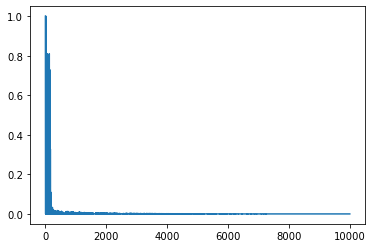

In [10]:
V,pi = monte_carlo_control_exploring_starts()

In [11]:
g.print_values(V)
g.print_policy(pi)

---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00| 0.90| 0.00|
---------------------------
 0.66| 0.73| 0.81| 0.73|
------------------
 R | R | R |   |
------------------
 U |   | U |   |
------------------
 U | R | U | L |


In [18]:
# so we pretty accurate estimate of the value function
# also we get our policy

<h1>Math</h1>

So although we've just learned how to use Monte Carlo for solving both the prediction problem and the control problem, there is still one small detail to consider

---

<h3>Monte Carlo for Control</h3>

As a quiz question, we want to think about what is impractical about the Monte Carlo exploring stars method?

---

<h3>Limitations of Exploring Starts</h3>

The answer is that exploring starts can't always be done in the real world

Imagine, for example, building a self-driving car

It's simply not possible to put out car into all possible states that it could ever be in 

Or imagine something simpler, like a video game

Unless we hack into the video game, we can't just have our characters start in any state that we want

The question is then, is there a solution to the problem of exploration that does not require exploring starts?

And remember, the reason why we needed this in the first place, it was because we needed to fill up samples for all state action pairs in $Q$

If our policy never tells us to perform action $a$ in state $s$, then we will never have any samples for action $a$ in state $s$ 

Without any samples, we don't have any estimate and we cannot choose the optimal action

---

<h3>Epsilon-Greedy Monte Carlo Control</h3>

The answer goes back to the classic method of epsilon greedy

Of course, we can employ other methods as well, but this is the traditional solution

So what does the algorithm look like?


$\text{Initialise:} \\ \qquad \pi = \text{ random policy with } \pi(a \vert s)>0 \text{ for all a,s} \\ \qquad Q(s,a) = \text{ arbitary (0 for terminal states)} \\ \qquad \text{returns(s,a) = [] (0 for terminal states)} \\ Loop: \\ \qquad \text{Reset to initial state }s_0 \\ \qquad \text{Play an episode to get } (a_0,r_1,s_1,a_1,\ldots,r_T,s_T) \\ \qquad G=0 \\ \qquad \text{for t in \{T-1,T-2,...,0\}:} \\ \qquad \qquad G = r_{t+1} + \gamma G \\ \qquad \qquad\text{if } s_t,a_t \text{ dont appear earlier in the episode: } \\ \qquad \qquad \qquad \text{returns}(s_t,a_t).append(G) \\ \qquad \qquad \qquad Q(s_t,a_t) = mean(returns(s_t,a_t)) \\ \qquad \qquad \qquad \text{Update } \pi$

Well, the initialization is essentially the same

The only requirement is that our initial policy gives a non-zero probability to performing each action in every state

For example, a uniform policy or an Epsilon greedy policy would both work 

Next we into a loop for some number of episodes

Inside the Loop, we play a single episode according to the current policy $\pi$, and we generate a sequence of states actions and rewards

Next, as usual, we initialize our return $G$ to zero

Then, as before, we loop through the episode in reverse, starting at timeStep $T-1$  

Inside the loop we update $G$ using the usual recursive formula

Then we check whether or not the current state action pair $s_t,a_t$ appears earlier in the
episode

This is for first visit Monte Carlo

If it does not appear, then we continue 

As before we appends our new $G$ sample to our list of returns for this state-action action pair

Then, as before we update $!$ using the sample mean of the returns we've collected so far for this state action pair

Finally, we come to the new part ($\text{Update } \pi$) where we find the best action, $a^*$ from $Q$ for the given state

But instead of making our policy just to always do action $a^*$ from the state $s(t)$, we use an
epsilon greedy policy

That is to say, our policy is now probabilistic

For the action $a^*$, we assign the probability one minus epsilon plus epsilon divided by the size of the action space

For all other actions, we assign the probability epsilon divided by the size of the action space

$$\large a^* = \arg \max_a Q(s_t,a)$$

$$\large \pi(a^*,s_t) = 1 - \varepsilon + \frac{\varepsilon}{\vert A \vert}$$

$$\large \pi(a \vert s_t) = \frac{\varepsilon}{\vert A \vert} \text{ for } a \neq a^*$$

---

<h3>How is this epsilon-greedy</h3>

Now, one question we may have is how does the previous probabilistic policy correspond to Epsilon greedy?

We are encouraged to to think about this as an exercise by ourselves

So here's a computer function that does Epsilon greedy, where with probability $\varepsilon$, we select an action at random from the action space with uniform probability

Otherwise we choose the optimal action

```python
def epsilon_greedy(Q,s,eps):
    if random() < eps:
        return random action
    else:
        return argmax(Q(s,:))
```

We want to prove to ourselves that by following this computer program, we equivalently have this mathematical expression for the policy

$$\large a^* = \arg \max_a Q(s_t,a)$$

$$\large \pi(a^*,s_t) = 1 - \varepsilon + \frac{\varepsilon}{\vert A \vert}$$

$$\large \pi(a \vert s_t) = \frac{\varepsilon}{\vert A \vert} \text{ for } a \neq a^*$$

Help : we can see how the probability of choosing at random is $\varepsilon$, and for a uniform distribution, the probability of choosing any action $a$ is $\frac{1}{\vert A \vert}$, so the probability of choosing randomly AND choosing action $a$ is equal to $\varepsilon \times \frac{1}{A} = \frac{\varepsilon}{\vert A \vert}$, as for $a^*$, we need to remember that there are two ways of choosing it, either choosing it determinisitically because it is the best value, the probability of that is $1-\varepsilon$, meaning the probability that we dont choose randomly, OR we can choose an action randomly and end up choosing $a^*$ by chance, the probability of choosing an action randomly as we have shown is $\frac{\varepsilon}{\vert A \vert}$, so the total probability is $1-\varepsilon+ \frac{\varepsilon}{A}$

---

<h3>Summary</h3>

OK, so that's everything we need to know about Monte Carlo without exploring stars

We've just learned how to remove the need for exploring starts, which would be impractical in the real world

<h1>code</h1>

In [19]:
# So here goes
# We will attempt coding Monte Carlo for Control problem + Exploring starts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# first lets implement our Gridworld enviroment
# we will be using the same interface as described above

class GridWorld:
    def __init__(self,rows,cols,start_pos):
        self.rows = rows
        self.cols = cols
        self.pos = start_pos
        self.start_pos = start_pos
    
    def current_state(self):
        return self.pos
    
    def set_state(self,state):
        self.pos = state
        
    def set_actions_rewards(self,actions,rewards):
        self.actions = actions
        self.rewards = rewards
        
    def all_states(self,):
        return [(i,j) for i in range(self.rows) for j in range(self.cols)]
    
    def is_terminal(self,state):
        # we cant perform an action in a terminal state
        # so we expect not to find it in the keys
        return state not in self.actions.keys()
    
    def game_over(self):
        return self.is_terminal(self.pos)
    
    def next_state(self,s,a):
        # return next state should we take action a
        # but do not take that action
        i,j = s
        # if we are allowed to do this action in our current position
        if a in self.actions.get(s,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        return (i,j)
    
    def move(self,a):
        # return next state should we take action a
        # this time we actually make the move
        # and thus return reward
        i,j = self.pos
        # if we are allowed to do this action in our current position
        if a in self.actions.get(self.pos,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        self.pos = (i,j)
        # if no reward return 0
        return self.rewards.get(self.pos,0)
    
    # lets add methods to print values and actions
    def print_values(self,V):
        for i in range(self.rows):
            print('-'*9*self.rows)
            for j in range(self.cols):
                v = V[i,j]
                if v >= 0:
                    # if 0 or +ve, add space so it aligns well when we have -
                    print(" %.2f|" %v,end="")
                else:
                    print("%.2f|" %v,end="")
            print("")
    
    def print_policy(self,P):
        for i in range(self.rows):
            print('-'*6*self.rows)
            for j in range(self.cols):
                print(" %s |" %P.get((i,j),' '),end="")
            print("")
                
    def state_to_loc(self,state): # convert state tupe (0,1) to location 1
        return state[0]*self.rows + state[1]
    
    def reset(self):
        self.pos = self.start_pos

In [3]:
def standrad_grid():
    g = GridWorld(3,4,(2,0))
    rewards = {(0,3):1,(1,3):-1}
    actions = {
        (0,0): ('D','R'),
        (0,1): ('L','R'),
        (0,2): ('L','D','R'),
        (1,0): ('U','D'),
        (1,2): ('U','D','R'),
        (2,0): ('U','R'),
        (2,1): ('L','R'),
        (2,2): ('L','R','U'),
        (2,3): ('L','U')
    }
    g.set_actions_rewards(actions,rewards)
    return g

In [21]:
g = standrad_grid()

In [5]:
def epsilon_greedy(best_action,eps=0.1):
    if np.random.random() < eps:
        return np.random.choice(['U','R','D','L'])
    else:
        return best_action

In [67]:
def monte_carlo_control_epsilon_greedy():
    all_states = g.all_states()
    state_space = len(all_states)
    non_terminal_states = list(g.actions.keys())
    all_actions = ['U','R','D','L']
    action_space = len(all_actions)
    gamma = 0.9
    # we will store deltas for Q
    deltas = []
    
    
    # lets follow the psuedocode
    pi = {s:all_actions[np.random.choice(action_space)] for s in all_states if not g.is_terminal(s)}
    # number of samples for (s,a), used for mean calculation
    num_samples = {}
    # also for debugging purposes, store how many times we visisted each states s
    num_visited = {}
    Q = np.zeros((g.rows,g.cols,action_space))
    Q_old = Q.copy()
    episodes = 5000
    
    for episode in range(episodes): # play multiple episodes
        states_actions_rewards = []
        if (episode+1)%100 == 0:
            print('episode: ',episode+1,'/',episodes,' done')
        # reset to start position
        g.reset()

        for T in range(20):
            s = g.current_state()
            a = epsilon_greedy(pi[s])
            r = g.move(a)

            states_actions_rewards.append((s,a,r))
            
            s_prime = g.current_state()
            num_visited[s_prime] = num_visited.get(s_prime,0)+1


            if g.game_over():
                break

        G = 0
        # store which (s,a) pairs we have seen before
        seen = set()
        for s,a,r in reversed(states_actions_rewards):
            G = r + gamma*G
            if (s,a) not in seen:
                seen.add((s,a))
                # first visit monte carlo
                # update mean using our more effecient rule
                num_samples[(s,a)] = num_samples.get((s,a),0)+1
                mean_s_a = Q[s[0],s[1],all_actions.index(a)]
                Q[s[0],s[1],all_actions.index(a)] = mean_s_a + 1/num_samples[(s,a)]*(G-mean_s_a)
                pi[s] = all_actions[np.argmax(Q[s])]
        delta = np.max(np.abs(Q - Q_old))
        deltas.append(delta)
        Q_old = Q.copy()
    
    # plot deltas
    plt.plot(deltas)
    plt.show()
    # turn into a num_visited into a dataframe so it prints well
    visited_df = np.zeros((g.rows,g.cols))
    for i in range(g.rows):
        for j in range(g.cols):
            visited_df[i,j] = num_visited.get((i,j),0)
    visited_df = pd.DataFrame(visited_df)
    print(visited_df)
    # return V,pi    
    return np.max(Q,axis=-1),pi   

episode:  100 / 5000  done
episode:  200 / 5000  done
episode:  300 / 5000  done
episode:  400 / 5000  done
episode:  500 / 5000  done
episode:  600 / 5000  done
episode:  700 / 5000  done
episode:  800 / 5000  done
episode:  900 / 5000  done
episode:  1000 / 5000  done
episode:  1100 / 5000  done
episode:  1200 / 5000  done
episode:  1300 / 5000  done
episode:  1400 / 5000  done
episode:  1500 / 5000  done
episode:  1600 / 5000  done
episode:  1700 / 5000  done
episode:  1800 / 5000  done
episode:  1900 / 5000  done
episode:  2000 / 5000  done
episode:  2100 / 5000  done
episode:  2200 / 5000  done
episode:  2300 / 5000  done
episode:  2400 / 5000  done
episode:  2500 / 5000  done
episode:  2600 / 5000  done
episode:  2700 / 5000  done
episode:  2800 / 5000  done
episode:  2900 / 5000  done
episode:  3000 / 5000  done
episode:  3100 / 5000  done
episode:  3200 / 5000  done
episode:  3300 / 5000  done
episode:  3400 / 5000  done
episode:  3500 / 5000  done
episode:  3600 / 5000  done
e

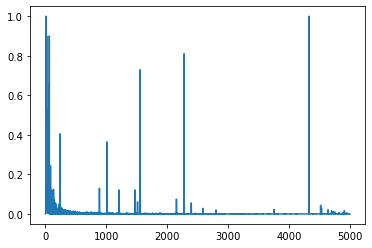

        0       1       2       3
0  5592.0  5529.0  5369.0  4988.0
1  5555.0     0.0   157.0     1.0
2   572.0   172.0    32.0     2.0


In [68]:
V,pi = monte_carlo_control_epsilon_greedy()

In [69]:
g.print_values(V)
g.print_policy(pi)

---------------------------
 0.79| 0.89| 1.00| 0.00|
---------------------------
 0.71| 0.00| 0.90| 0.00|
---------------------------
 0.63| 0.66| 0.76| 0.73|
------------------
 R | R | R |   |
------------------
 U |   | U |   |
------------------
 U | R | U | L |


So if we look at our policy, we see that it makes sense

Our agent is capable of getting to the goal from any state on the grid

However, we'll notice that the policy and the values are not the same as what we got before

So how did this happen?

Well, looking at the sample counts for each state explains why 

We can see that our agent prefers to go up from the start 

Because of this, we have lots of samples for Up the path

So along the left edge and the top edge

But in the bottom right area, we have very few samples

This is because our policy dictates that we should not go there

The only time we end up going this way is if we randomly choose to due to Epsilon greedy

We can see that as we go further and further away from what the policy dictates, the number of samples we collect gets smaller and smaller

Therefore, we cannot expect the value function to be accurate for those states

<h1>Math</h1>

In this section, we'll be summarizing everything we learned in the notebook

---

<h3>Monte Carlo notebook Summary</h3>

This section was all about the Monte Carlo method

This notebook represented an important step in our study of reinforcement learning 

In the previous notebooks, all of our work was theoretical

We didn't create any actual agents that would play games in an environment

Our agents didn't learn from experience

This notebook was the transition to the practical world where we did program an agent to produce and learn from experience

So this was an important step

---

The main idea behind this section is actually pretty simple

It all goes back to bandit notebook where we talked about how to estimate expected value

$$\large V_\pi(s) = E[G_t \vert S_t = s] \approx \frac{1}{N} \sum^N_{i=1} G_{i,s}$$

Since we don't know the probability distribution that this expected value is being taken with respect to, we can't compute it directly

However, we can collect samples by playing many episodes

Put simply, we estimate the expected value with the sample mean

---

Along the way, we learned several important concepts

Firstly, we learned how the concept of policy iteration is applied in the context of sample based learning methods

Although the version of policy iteration that we studied before would be possible, it was also not practical

We also learned why it's necessary to estimate $Q$ rather than $V$ when it comes to control

Lastly, we rediscovered the need for exploration and how Epsilon Greedy can be applied to serve that need